# Junta Aeronautica Civil (JAC) Data

Downloaded from: [JAC Chile](https://www.jac.gob.cl/estadisticas/estadisticas-historicas/)

In [ ]:
import requests
import numpy as np
import pandas as pd

# Row indexes for the data
pax_arrived_xy_start  = 5
pax_arrived_xy_end = 593

pax_departed_xy_start = 604
pax_departed_xy_end = 1293

## Arrivals

In [67]:
# Load .\JAC\2010-2019-Trafico-de-Par-de-ciudades-por-Operador-Internacional.xls
pax_arrival_data = pd.read_excel(
                    r'.\JAC\2010-2019-Trafico-de-Par-de-ciudades-por-Operador-Internacional.xls', 
                    sheet_name='ciudades x ope inter',
                    header=pax_arrived_xy_start,
                    nrows=pax_arrived_xy_end-pax_arrived_xy_start,
                    )

pax_arrival_data = pax_arrival_data.replace(0, np.nan) 

# Repeat the city names for each operator
pax_arrival_data['LLEGAN:'] = pax_arrival_data['LLEGAN:'].ffill()
pax_arrival_data['DESDE:'] = pax_arrival_data['DESDE:'].ffill()

# Remove all rows where 'LLEGAN:' starts with 'Total'
pax_arrival_data = pax_arrival_data[~pax_arrival_data['LLEGAN:'].str.startswith('Total ')]
pax_arrival_data = pax_arrival_data[~pax_arrival_data['DESDE:'].str.startswith('Total ')]

# Sort by 'LLEGAN:' and 'DESDE:'
pax_arrival_data = pax_arrival_data.sort_values(by=['LLEGAN:', 'DESDE:'])

display(pax_arrival_data.head())
pax_arrival_data.tail()

,LLEGAN:,DESDE:,OPERADOR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
394,ANTOFAGASTA,AREQUIPA,SKY AIRLINE,NaN,465.0,1685.0,1062.0,NaN,NaN,NaN,NaN,NaN,NaN
396,ANTOFAGASTA,"CUZCO, PERU",LATAM AIRLINES PERU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0
398,ANTOFAGASTA,FLORIANAPOLIS,LATAM AIRLINES CHILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,NaN,NaN
399,ANTOFAGASTA,FLORIANAPOLIS,LATAM AIRLINES GROUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,325.0,155.0
400,ANTOFAGASTA,FLORIANAPOLIS,PAL AIRLINES,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,LLEGAN:,DESDE:,OPERADOR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
340,SANTIAGO,"USHUAIA, ARG.",LATAM AIRLINES CHILE,NaN,NaN,NaN,NaN,NaN,NaN,434.0,NaN,NaN,NaN
341,SANTIAGO,"USHUAIA, ARG.",LATAM AIRLINES GROUP,1963.0,825.0,354.0,255.0,NaN,197.0,498.0,638.0,2734.0,2657.0
343,SANTIAGO,VARADERO,PAL AIRLINES,1200.0,1503.0,2605.0,1903.0,2169.0,NaN,NaN,NaN,NaN,NaN
464,TEMUCO,LIMA,LATAM AIRLINES GROUP,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN
466,TEMUCO,PORTO ALEGRE,GOL TRANS,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN


In [121]:
# Count non-NaN values in each column
xy_operators = pax_arrival_data.groupby(['LLEGAN:', 'DESDE:']).count().drop(columns=['OPERADOR'])
xy_operators_arriving = xy_operators.reset_index().melt(id_vars=['LLEGAN:', 'DESDE:'], var_name='YEAR', value_name='OPERADORES')
xy_operators_arriving['DIRECT_FLIGHTS'] = np.where(xy_operators_arriving['OPERADORES'] > 0, 1, 0)

stg_arrivals = xy_operators_arriving.query('`LLEGAN:` == "SANTIAGO"').pivot(index='YEAR', columns='DESDE:', values='OPERADORES').fillna(0).astype(int)

print("Operators arriving in Santiago per destination:")
display(stg_arrivals)

Operators arriving in Santiago per destination:


DESDE:,AMSTERDAM,AREQUIPA,ASUNCION,ATLANTA,AUCKLAND N.Z.,BARCELONA ESP.,BARCELONA VENEZ.,BARILOCHE,BARRANQUILLA,BELO HORIZONTE,...,SANTO DOMINGO,SAO PAULO,SYDNEY,TEL AVID,TENERIFE,TORONTO,TRUJILLO,TUCUMAN,"USHUAIA, ARG.",VARADERO
YEAR,,,,,,,,,,,,,,,,,,,,,
2010,0,1,2,1,1,1,0,0,0,1,...,2,5,1,0,0,2,0,0,1,1
2011,0,1,4,1,1,1,0,0,0,0,...,2,6,1,0,0,2,0,0,1,1
2012,0,1,2,2,1,1,1,1,0,1,...,1,4,2,0,0,1,0,0,1,1
2013,0,1,4,1,1,1,0,3,1,1,...,1,4,2,0,0,1,0,0,1,1
2014,0,0,1,1,1,0,0,0,0,1,...,1,6,2,0,0,1,0,0,0,1
2015,0,0,3,1,1,0,0,0,0,1,...,0,5,2,0,0,1,0,0,1,0
2016,1,1,5,1,1,0,0,0,1,1,...,0,5,2,0,0,1,0,0,2,0
2017,1,0,2,1,2,0,0,1,1,0,...,0,6,3,0,0,1,0,1,1,0
2018,1,0,4,1,1,0,0,1,0,2,...,0,6,2,1,0,1,1,2,2,0


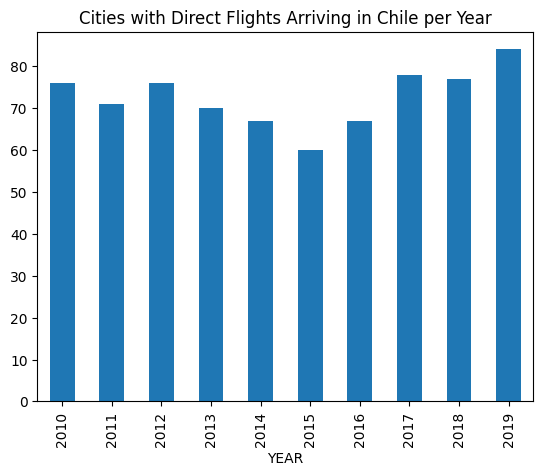

In [131]:
xy_operators_arriving.groupby(['YEAR'])['DIRECT_FLIGHTS'].sum().plot(kind='bar', title='Cities with Direct Flights Arriving in Chile per Year');

## Departures

In [122]:
##
## Passanger Departures
##

# Load .\JAC\2010-2019-Trafico-de-Par-de-ciudades-por-Operador-Internacional.xls
pax_departure_data = pd.read_excel(
                    r'.\JAC\2010-2019-Trafico-de-Par-de-ciudades-por-Operador-Internacional.xls', 
                    sheet_name='ciudades x ope inter',
                    header=pax_departed_xy_start,
                    nrows=pax_departed_xy_end-pax_departed_xy_start,
                    )

pax_departure_data = pax_departure_data.replace(0, np.nan)

# Repeat the city names for each operator
pax_departure_data['LLEGAN:'] = pax_departure_data['LLEGAN:'].ffill()
pax_departure_data['DESDE:'] = pax_departure_data['DESDE:'].ffill()

# Remove all rows where 'LLEGAN:' starts with 'Total'
pax_departure_data = pax_departure_data[~pax_departure_data['LLEGAN:'].str.startswith('Total ')]
pax_departure_data = pax_departure_data[~pax_departure_data['DESDE:'].str.startswith('Total ')]

# Sort by 'LLEGAN:' and 'DESDE:'
pax_departure_data = pax_departure_data.sort_values(by=['LLEGAN:', 'DESDE:'])

display(pax_departure_data.head())
pax_departure_data.tail()

,DESDE:,LLEGAN:,OPERADOR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
619,SANTIAGO,AMSTERDAM,AIR FRANCE,NaN,NaN,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN
620,SANTIAGO,AMSTERDAM,K.L.M.,NaN,NaN,NaN,NaN,18076.0,20787.0,23439.0,22489.0,31778.0,30335.0
480,ANTOFAGASTA,AREQUIPA,ONE SPA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
481,ANTOFAGASTA,AREQUIPA,SKY AIRLINE,NaN,392.0,1469.0,911.0,NaN,NaN,NaN,NaN,NaN,NaN
425,ARICA,AREQUIPA,JETSMART SPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0


,DESDE:,LLEGAN:,OPERADOR,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
421,SANTIAGO,VARADERO,PAL AIRLINES,1195.0,2675.0,2598.0,1899.0,2165.0,NaN,NaN,NaN,NaN,NaN
423,SANTIAGO,"VITORIA, BRA.",GOL TRANS,501.0,1024.0,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,SANTIAGO,"WASHINGTON, US.",C.O.P.A.,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,SANTIAGO,"WASHINGTON, US.",LATAM AIRLINES GROUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN
616,SANTIAGO,"WASHINGTON, US.",UNITED AIRLINES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN


In [123]:
# Count non-NaN values in each column
xy_operators = pax_departure_data.groupby(['LLEGAN:', 'DESDE:']).count().drop(columns=['OPERADOR'])
xy_operators_departing = xy_operators.reset_index().melt(id_vars=['LLEGAN:', 'DESDE:'], var_name='YEAR', value_name='OPERADORES')
xy_operators_departing['DIRECT_FLIGHTS'] = np.where(xy_operators_departing['OPERADORES'] > 0, 1, 0)

stg_departures = xy_operators_departing.query('`DESDE:` == "SANTIAGO"').pivot(index='YEAR', columns='LLEGAN:', values='OPERADORES').fillna(0).astype(int)

print("Operators departing from Santiago per destination:")
display(stg_departures)

Operators departing from Santiago per destination:


LLEGAN:,AMSTERDAM,AREQUIPA,ASUNCION,ATLANTA,AUCKLAND N.Z.,BARCELONA ESP.,BARCELONA VENEZ.,BARILOCHE,BARRANQUILLA,BELO HORIZONTE,...,SYDNEY,TEGUCIGALPA,TEL AVID,TORONTO,TRUJILLO,TUCUMAN,"USHUAIA, ARG.",VARADERO,"VITORIA, BRA.","WASHINGTON, US."
YEAR,,,,,,,,,,,,,,,,,,,,,
2010,0,1,4,1,2,2,0,0,0,2,...,2,1,0,2,0,0,1,1,1,1
2011,0,1,5,1,2,2,0,0,0,2,...,2,0,0,2,0,0,1,1,1,0
2012,0,1,5,1,3,3,1,1,0,2,...,4,0,0,1,0,0,1,1,1,0
2013,0,1,6,1,1,3,0,3,1,1,...,4,0,0,1,0,0,1,1,0,0
2014,1,0,4,1,1,2,0,0,0,5,...,3,0,0,1,0,0,0,1,0,0
2015,2,0,6,1,1,1,0,0,0,1,...,2,0,0,1,0,0,1,0,0,0
2016,1,1,6,1,1,0,0,0,2,1,...,2,0,0,1,0,0,2,0,0,0
2017,1,0,3,1,1,0,0,1,0,0,...,2,0,0,1,0,2,1,0,0,1
2018,1,0,4,1,1,0,0,1,0,1,...,2,0,1,1,1,2,2,0,0,1


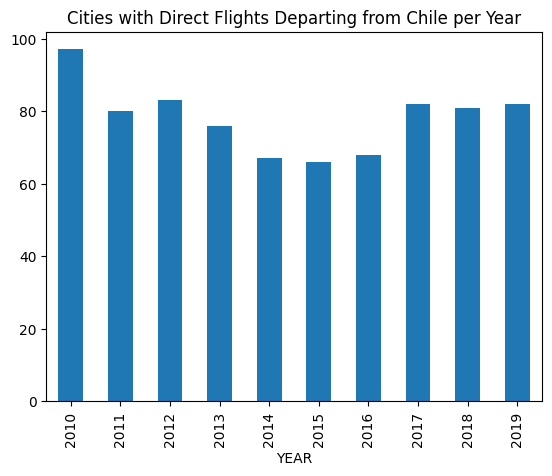

In [133]:
xy_operators_departing.groupby(['YEAR'])['DIRECT_FLIGHTS'].sum().plot(kind='bar', title='Cities with Direct Flights Departing from Chile per Year');

# Both

In [124]:
flights = pd.concat([xy_operators_arriving, xy_operators_departing], axis=0, ignore_index=True)
flights = flights.groupby(['YEAR', 'LLEGAN:', 'DESDE:']).sum().reset_index()

flights

,YEAR,LLEGAN:,DESDE:,OPERADORES,DIRECT_FLIGHTS
0,2010,AMSTERDAM,SANTIAGO,0,0
1,2010,ANTOFAGASTA,AREQUIPA,0,0
2,2010,ANTOFAGASTA,"CUZCO, PERU",0,0
3,2010,ANTOFAGASTA,FLORIANAPOLIS,1,1
4,2010,ANTOFAGASTA,LA PAZ,1,1
...,...,...,...,...,...
3195,2019,"USHUAIA, ARG.",PUNTA ARENAS,1,1
3196,2019,"USHUAIA, ARG.",SANTIAGO,1,1
3197,2019,VARADERO,SANTIAGO,0,0
3198,2019,"VITORIA, BRA.",SANTIAGO,0,0


In [120]:
flights.groupby(['YEAR'])['DIRECT_FLIGHTS'].sum()

YEAR
2010    173
2011    151
2012    159
2013    146
2014    134
2015    126
2016    135
2017    160
2018    158
2019    166
Name: DIRECT_FLIGHTS, dtype: int32